In [101]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [102]:
x = np.array([155, 180, 164, 162, 181, 182, 173, 190, 171, 170, 181, 182, 189, 184, 209, 210])
y = np.array([51, 52, 54, 53, 55, 59, 61, 59, 63, 76, 64, 66, 69, 72, 70, 80])

In [103]:
def h(theta0, theta1, x):
    return theta0 + theta1*x

def cost(theta0, theta1, x, y):
    m = x.shape[0]
    y_pred = h(theta0, theta1, x)
    return 1 / (2*m) * sum((y_pred - y)**2)

def grad(theta0, theta1, x, y):
    m = x.shape[0]
    y_pred = h(theta0, theta1, x)
    grad0 = 1 / m * sum(y_pred - y)
    grad1 = 1 / m * sum((y_pred - y) * x)
    return (grad0, grad1)

def grad_descent(theta0, theta1, x, y, rate, iterations):
    history = {"theta0": [], "theta1": [], "it": [], "grad_norm": [], "cost": []}
    for it in range(iterations):
        (grad0, grad1) = grad(theta0, theta1, x, y)
        theta0 = theta0 - rate*grad0
        theta1 = theta1 - rate*grad1
        grad_norm = np.linalg.norm([theta0, theta1])

        history["theta0"].append(theta0)
        history["theta1"].append(theta1)
        history["it"].append(it)
        history["grad_norm"].append(grad_norm)
        history["cost"].append(cost(theta0, theta1, x, y))

    return (theta0, theta1, history)

theta0:  0.6909978026349748
theta1:  0.34460049833687856
cost:  22.199762068243142


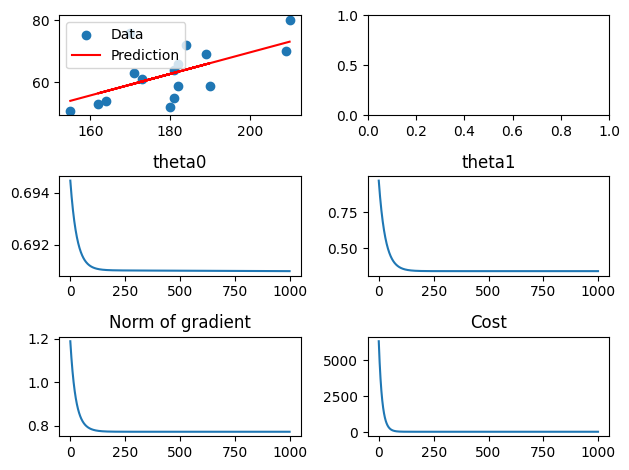

In [107]:
theta0 = np.random.rand()
theta1 = np.random.rand()
rate = 1e-6
iterations = 1000

(theta0_opt, theta1_opt, history) = grad_descent(theta0, theta1, x, y, rate, iterations)

fig, axs = plt.subplots(3, 2)

axs[1, 0].set_title("theta0")
axs[1, 0].plot(history["theta0"])

axs[1, 1].set_title("theta1")
axs[1, 1].plot(history["theta1"])

axs[2, 0].set_title("Norm of gradient")
axs[2, 0].plot(history["grad_norm"])

axs[2, 1].set_title("Cost")
axs[2, 1].plot(history["cost"])

axs[0, 0].scatter(x, y, label="Data")
y_pred = theta0_opt + theta1_opt*x
axs[0, 0].plot(x, y_pred, color="red", label="Prediction")
axs[0, 0].legend()

fig.tight_layout()

print("theta0: ", theta0_opt)
print("theta1: ", theta1_opt)
print("cost: ", history["cost"][-1])